# Reinforcement Learning Introduction

For compatibility with Colab
https://github.com/araffin/rl-tutorial-jnrr19

## Setup

Installing Dependencies

https://stable-baselines3.readthedocs.io/en/master/

In [ ]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [ ]:
# HIDE OUTPUT
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [ ]:
# For "LunarLander-v3"

!pip install swig
!pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379496 sha256=d451ec3ff569cd66d5fc19d9c8164f474f82b196da5aad3de0ac4bea1b765efe
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [ ]:
# File Directory
import glob
import io
import base64
import os
import shutil

# RL
import gymnasium as gym

# For Rendering Video in Colab
from gymnasium.wrappers import RecordVideo
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

# Compatibility
import numpy as np
np.bool8 = np.bool_

display = Display(visible=0, size=(1400, 900))
display.start()

## Load Environment

https://www.gymlibrary.dev/content/basic_usage/

https://gymnasium.farama.org/introduction/basic_usage/

In [ ]:
# Preview of the Environment
def query_environment(name):
    env = gym.make(name, render_mode="rgb_array")
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Threshold: {spec.reward_threshold}")

# Opening Video of Policy in Colab
def show_video(path='video/*.mp4'):
    mp4list = glob.glob(path)
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

folder_path = "/content/video"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
env_name = "CartPole-v1"
environ = gym.make(env_name, render_mode="rgb_array")

In [ ]:
folder_path = "/content/video"  # Change to your folder path
shutil.rmtree(folder_path)

environ = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(environ, video_folder="./video", disable_logger=True, video_length=1000)

for episode in range(5):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample() # Generate random action
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        print([action, obs, reward, terminated])
    print(f'Action: {action}')
    print(f'State: {obs}')
    print(f'Reward: {reward}')
    print(f'Episode: {episode} Total Score: {score}\n')

env.close()

[np.int64(0), array([-0.0368267 , -0.2232229 ,  0.04661824,  0.3272299 ], dtype=float32), 1.0, False]
[np.int64(0), array([-0.04129116, -0.4189765 ,  0.05316284,  0.63424206], dtype=float32), 1.0, False]
[np.int64(1), array([-0.04967069, -0.22463483,  0.06584768,  0.35876393], dtype=float32), 1.0, False]
[np.int64(1), array([-0.05416339, -0.03050773,  0.07302296,  0.0875496 ], dtype=float32), 1.0, False]
[np.int64(1), array([-0.05477354,  0.16349566,  0.07477395, -0.18123029], dtype=float32), 1.0, False]
[np.int64(1), array([-0.05150363,  0.35747242,  0.07114934, -0.44941935], dtype=float32), 1.0, False]
[np.int64(0), array([-0.04435418,  0.16142003,  0.06216096, -0.13518453], dtype=float32), 1.0, False]
[np.int64(0), array([-0.04112578, -0.03453466,  0.05945727,  0.17644338], dtype=float32), 1.0, False]
[np.int64(0), array([-0.04181647, -0.23045489,  0.06298614,  0.48727456], dtype=float32), 1.0, False]
[np.int64(0), array([-0.04642557, -0.42640638,  0.07273163,  0.7991246 ], dtype=fl

In [ ]:
show_video()

https://gymnasium.farama.org/environments/classic_control/cart_pole/

In [ ]:
query_environment(env_name)

Action Space: Discrete(2)
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Max Episode Steps: 500
Reward Threshold: 475.0


In [ ]:
folder_path = "/content/video"  # Change to your folder path
shutil.rmtree(folder_path)

env_name = "LunarLander-v3"
environ = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(environ, video_folder="./video", disable_logger=True, video_length=1000)

for episode in range(2):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample() # Generate random action
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        print([action, obs, reward, terminated])
    print(f'Episode: {episode} Score: {score}\n')

env.close()

[np.int64(2), array([ 0.00422478,  1.4132946 ,  0.21136649,  0.05528213, -0.00514842,
       -0.053556  ,  0.        ,  0.        ], dtype=float32), np.float64(-0.3088153830114095), False]
[np.int64(0), array([ 0.00631151,  1.4139389 ,  0.211375  ,  0.02862167, -0.00782432,
       -0.05352303,  0.        ,  0.        ], dtype=float32), np.float64(0.18443709251741325), False]
[np.int64(0), array([ 0.00839825,  1.4139832 ,  0.21138287,  0.00195258, -0.01049999,
       -0.0535181 ,  0.        ,  0.        ], dtype=float32), np.float64(-0.08187714887287711), False]
[np.int64(1), array([ 0.01041994,  1.4134347 ,  0.20323257, -0.02438432, -0.01153802,
       -0.02076281,  0.        ,  0.        ], dtype=float32), np.float64(0.5898650143630289), False]
[np.int64(1), array([ 0.0123806 ,  1.4122795 ,  0.19555941, -0.0513368 , -0.01103888,
        0.00998394,  0.        ,  0.        ], dtype=float32), np.float64(0.38433174537263537), False]
[np.int64(1), array([ 0.01427994,  1.4105353 ,  0.18786

In [ ]:
show_video()

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [ ]:
query_environment(env_name)

Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Reward Threshold: 200


## Model Training

Selecting Algorithm based on Action Space:

https://stable-baselines3.readthedocs.io/en/master/guide/algos.html

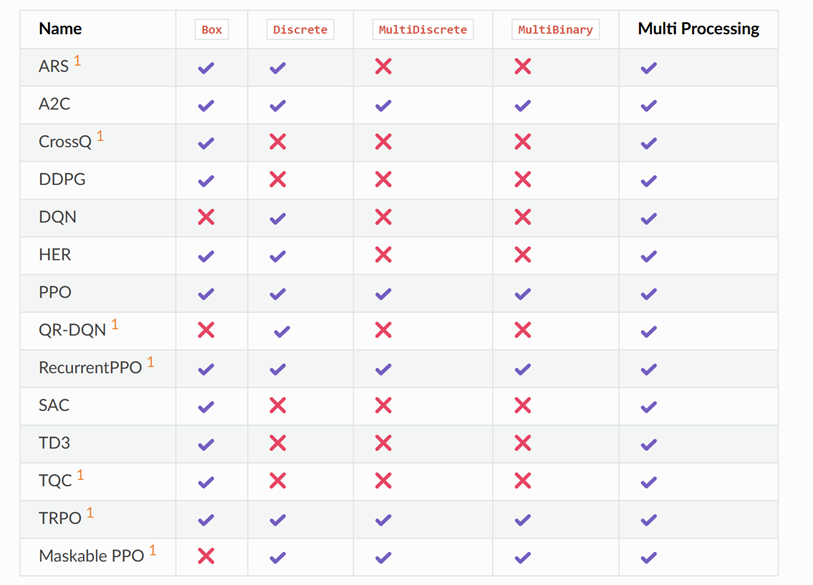

In [ ]:
from stable_baselines3 import PPO #Algorithm, check docs for others
from stable_baselines3.common.vec_env import DummyVecEnv # Wrapper for the env

In [ ]:
# Create folder for saving logs and models

folder_path = "/content/Training"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

folder_path = "/content/Training/Logs"
os.makedirs(folder_path, exist_ok=True)

folder_path = "/content/Training/Saved Models"
os.makedirs(folder_path, exist_ok=True)

log_path = os.path.join('Training', 'Logs')

In [ ]:
env_name = "CartPole-v1"
env = gym.make(env_name)
env = DummyVecEnv([lambda: env]) #Wrap env into a dummy vectorized environment (for compatibility purposes)

# Defining the agent (policy, environment, log path)
model = PPO('MlpPolicy', env, tensorboard_log=log_path, verbose=1) # Proximal Policy Optimization

Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(




https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html

MlpPolicy → For environments with low-dimensional, vector observations (e.g., CartPole, LunarLander).

CnnPolicy → For image-based observations (e.g., Atari games, self-driving cars).

MultiInputPolicy → For multi-modal inputs (combining numerical & visual data).

In [ ]:
model.learn(total_timesteps=20000) # Depending on complexity of environment

Logging to Training/Logs/PPO_1
-----------------------------
| time/              |      |
|    fps             | 569  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 485         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008977208 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00615     |
|    learning_rate        | 0.0003      |
|    loss                 | 8.61        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0138     |
|    value_loss           | 53.6        |
-----------------------------------------
---

Training Metrics

1. approx_kl - Measures how much the new policy deviates from the old policy during training.
- Low values (~0.01 or lower) indicate stable training.
- High values (~0.1 or more) suggest the new policy is diverging too much from the old one.

2. clip_fraction - Percentage of policy updates that were clipped due to the clipping parameter (clip_range).
- High values (~0.2-0.3) indicate frequent clipping (potentially limiting learning).
- Low values (~0.03-0.1) mean updates are mostly within the safe range.

3. entropy_loss - Measures exploration; higher absolute values mean the agent is more uncertain (more exploration).
- Lower values (~-0.5 to -1.0) suggest the policy is becoming more deterministic.
- Higher values (~-2 or more negative) indicate the agent is still exploring.

4. explained_variance - Indicates how well the value function explains variance in rewards (closer to 1.0 is better)
- 1.0: Perfect prediction.
- 0.0: No correlation between predicted and actual values.

5. loss - A combination of policy loss, value loss, and entropy loss.
- Lower values indicate the model is stabilizing

6. policy_gradient_loss - Measures how much the policy is improving.
- Negative values mean the policy is being pushed towards better actions

7. value_loss - Measures how well the value function predicts future state values and rewards.
- Lower is better, but it depends on the problem complexity.

In [ ]:
# Saving Model
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_Model_Cartpole')
model.save(PPO_path)

In [ ]:
# Delete Existing Model
del model

In [ ]:
# Reload Saved Model
model = PPO.load(PPO_path, env=env)

## Evaluating RL Model

Common Metric:
- Average Reward (Based on rules set by Environment)

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy #Testing/Validation

In [ ]:
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print('Trained Model')
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Trained Model
mean_reward:500.00 +/- 0.00


In [ ]:
model2 = PPO('MlpPolicy', env, tensorboard_log=log_path, verbose=1)
mean_reward2, std_reward2 = evaluate_policy(model2, env, n_eval_episodes=100)

print('Base Model')
print(f"mean_reward:{mean_reward2:.2f} +/- {std_reward2:.2f}")

Using cuda device
Base Model
mean_reward:33.53 +/- 9.14


In [ ]:
folder_path = "/content/video_test"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/video_test/"  # Change to your folder path
shutil.rmtree(folder_path)

env_name = 'CartPole-v1'

environ = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(environ, video_folder="/content/video_test", disable_logger=True, video_length=1000)

for episode in range(2):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        # print([action, obs, reward, terminated])
    print(f'Episode: {episode} Score: {score}\n')

env.close()

Episode: 0 Score: 500.0

Episode: 1 Score: 500.0



In [ ]:
show_video('video_test/*.mp4')

In [ ]:
folder_path = "/content/video_base"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/video_base/"  # Change to your folder path
shutil.rmtree(folder_path)

env_name = 'CartPole-v1'

environ = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(environ, video_folder="/content/video_base", disable_logger=True, video_length=1000)

for episode in range(2):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action, _ = model2.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        # print([action, obs, reward, terminated])
    print(f'Episode: {episode} Score: {score}\n')

env.close()

Episode: 0 Score: 38.0

Episode: 1 Score: 29.0



In [ ]:
show_video('video_base/*.mp4')

Training Strategies to improve performance
1. Longer Training
2. Hyperparameter Tuning
3. Model/Algorithm Selection

## Viewing Log

In [ ]:
training_log_path = os.path.join(log_path, 'PPO_1')
training_log_path

'Training/Logs/PPO_1'

In [ ]:
# !tensorboard --logdir={training_log_path}

## Callbacks

In [ ]:
 from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [ ]:
save_path = os.path.join('Training', 'Saved Models')

In [ ]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env,
                             callback_on_new_best=stop_callback,
                             eval_freq=5000,
                             best_model_save_path=save_path,
                             verbose=1)

In [ ]:
model_cb = PPO('MlpPolicy', env, tensorboard_log=log_path, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model_cb.learn(total_timesteps=30000, callback=eval_callback)

Logging to Training/Logs/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | 21.5     |
| time/              |          |
|    fps             | 212      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 25          |
|    ep_rew_mean          | 25          |
| time/                   |             |
|    fps                  | 206         |
|    iterations           | 2           |
|    time_elapsed         | 19          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008824759 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00192    |

## Changing Policies

In [ ]:
net_arch = dict(pi=[128,128,128,128], vf=[128,128,128,128])
# net_arch = [128, 128]
net_arch

{'pi': [128, 128, 128, 128], 'vf': [128, 128, 128, 128]}

In [ ]:
model_cp = PPO('MlpPolicy', env, tensorboard_log=log_path, verbose=1,
               policy_kwargs={'net_arch': net_arch})

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model_cp.learn(total_timesteps=30000, callback=eval_callback)

Logging to Training/Logs/PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | 23       |
| time/              |          |
|    fps             | 301      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.8        |
|    ep_rew_mean          | 28.8        |
| time/                   |             |
|    fps                  | 327         |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014089188 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.000971   |

## Alternate Algorithm

In [ ]:
from stable_baselines3 import DQN

In [ ]:
model_dqn = DQN('MlpPolicy', env, tensorboard_log=log_path, verbose=1) # Deep Q Network

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model_dqn.learn(total_timesteps=30000, log_interval=5000, callback=eval_callback)

Logging to Training/Logs/DQN_1
Eval num_timesteps=5000, episode_reward=9.40 +/- 0.49
Episode length: 9.40 +/- 0.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 9.4      |
|    mean_reward      | 9.4      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 5000     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000764 |
|    n_updates        | 1224     |
----------------------------------
Eval num_timesteps=10000, episode_reward=9.40 +/- 0.80
Episode length: 9.40 +/- 0.80
----------------------------------
| eval/               |          |
|    mean_ep_length   | 9.4      |
|    mean_reward      | 9.4      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 10000    |
| train/              |          |
|    learning_rate    | 0.0001

## Atari Breakout

https://ale.farama.org/environments/breakout/

In [ ]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.env_util import make_atari_env
import ale_py

In [ ]:
gym.register_envs(ale_py)
env_atari = gym.make('ALE/Breakout-v5', render_mode="rgb_array")

In [ ]:
folder_path = "/content/atari"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/atari"  # Change to your folder path
shutil.rmtree(folder_path)

env = RecordVideo(env_atari, video_folder="/content/atari", disable_logger=True, video_length=1000)

for episode in range(5):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample() # Generate random action
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        # print([action, obs, reward, terminated])
    print(f'Action: {action}')
    print(f'State: {obs}')
    print(f'Reward: {reward}')
    print(f'Episode: {episode} Score: {score}\n')

env.close()

Action: 3
State: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Reward: 0.0
Episode: 0 Score: 4.0

Action: 3
State: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Reward: 0.0
Episode: 1 Score: 2.0

Action: 1
State: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 

In [ ]:
show_video('atari/*.mp4')

In [ ]:
query_environment("ALE/Breakout-v5")

Action Space: Discrete(4)
Observation Space: Box(0, 255, (210, 160, 3), uint8)
Max Episode Steps: None
Reward Threshold: None


In [ ]:
env_atari = make_atari_env('ALE/Breakout-v5', n_envs=4, seed=0)
env_atari_vec = VecFrameStack(env_atari, n_stack=4)

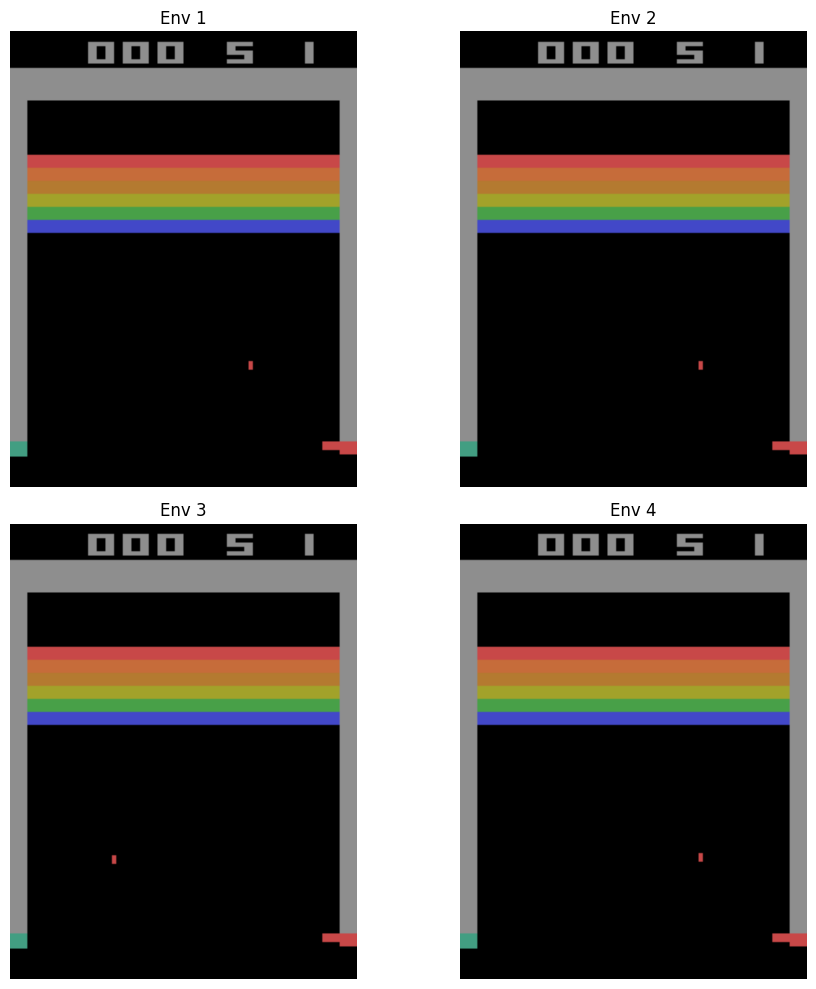

In [ ]:
# Reset environment to get initial frames
obs = env_atari_vec.reset()

# Capture a frame from each environment
frames = env_atari.get_images()  # Returns a list of 4 frames (one per env)

# Create a 2x2 grid to display the frames
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(frames[i])  # Display the frame for each env
    ax.axis("off")
    ax.set_title(f"Env {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
log_path = os.path.join('Training', 'Logs')
model_atari = A2C('CnnPolicy', env_atari_vec, verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
model_atari.learn(total_timesteps=500000, log_interval=10000)

Logging to Training/Logs/A2C_1
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 759      |
|    ep_rew_mean        | 19.4     |
| time/                 |          |
|    fps                | 220      |
|    iterations         | 10000    |
|    time_elapsed       | 905      |
|    total_timesteps    | 200000   |
| train/                |          |
|    entropy_loss       | -0.0136  |
|    explained_variance | 0.93     |
|    learning_rate      | 0.0007   |
|    n_updates          | 9999     |
|    policy_loss        | -0.00043 |
|    value_loss         | 0.134    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 826      |
|    ep_rew_mean        | 22.2     |
| time/                 |          |
|    fps                | 225      |
|    iterations         | 20000    |
|    time_elapsed       | 1774     |
|    total_timesteps    | 400000   |
| train

In [ ]:
a2c_path = os.path.join('Training', 'Saved Models', 'A2C_Breakout_Model')
model_atari.save(a2c_path)

In [ ]:
del model_atari

In [ ]:
model_atari = A2C.load(a2c_path, env_atari_vec)

Wrapping the env in a VecTransposeImage.


In [ ]:
mean_reward, std_reward = evaluate_policy(model_atari, env_atari_vec, n_eval_episodes=20)

print('Trained Model')
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Trained Model
mean_reward:23.05 +/- 6.80


In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder

In [ ]:
folder_path = "/content/atari_test"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/atari_test/"  # Change to your folder path
shutil.rmtree(folder_path)

# env_atari = gym.make('ALE/Breakout-v5', render_mode="rgb_array")
env_atari = make_atari_env('ALE/Breakout-v5', n_envs=1, seed=13)
env = VecFrameStack(env_atari, n_stack=4)
env = VecVideoRecorder(env, video_folder="/content/atari_test",
                       record_video_trigger=lambda x: x == 0, video_length=1000)

for episode in range(5):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        action, _ = model_atari.predict(obs)
        obs, reward, terminated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        # print([action, obs, reward, terminated])
    print(f'Episode: {episode} Score: {score}\n')

env.close()

Episode: 0 Score: [6.]

Episode: 1 Score: [0.]

Episode: 2 Score: [0.]

Episode: 3 Score: [0.]

Episode: 4 Score: [0.]

Moviepy - Building video /content/atari_test/rl-video-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/atari_test/rl-video-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/atari_test/rl-video-step-0-to-step-1000.mp4


In [ ]:
show_video('atari_test/*.mp4')

## CarRacing

https://gymnasium.farama.org/environments/box2d/car_racing/

In [ ]:
env_car = gym.make("CarRacing-v3", render_mode="rgb_array", lap_complete_percent=0.95,
                   domain_randomize=False, continuous=False)
env_car

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CarRacing<CarRacing-v3>>>>>

In [ ]:
folder_path = "/content/racing"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/racing"  # Change to your folder path
shutil.rmtree(folder_path)

env = RecordVideo(env_car, video_folder="/content/racing", disable_logger=True, video_length=1000)

for episode in range(2):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample() # Generate random action
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
    # print([action, obs, reward, terminated])
    print(f'Action: {action}')
    print(f'State: {obs}')
    print(f'Reward: {reward}')
    print(f'Episode: {episode} Score: {score}\n')

env.close()

Action: 0
State: [[[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100 228 100]
  [100 228 100]
  [100 228 100]]

 [[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100 228 100]
  [100 228 100]
  [100 228 100]]

 [[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100 228 100]
  [100 228 100]
  [100 228 100]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Reward: -0.10000000000000142
Episode: 0 Score: -53.571428571429344

Action: 4
State: [[[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100 202 100]
  [100 202 100]
  [100 202 100]]

 [[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100 202 100]
  [100 202 100]
  [100 202 100]]

 [[100 202 100]
  [100 202 100]
  [100 202 100]
  ...
  [100

In [ ]:
show_video('racing/*.mp4')

In [ ]:
query_environment("CarRacing-v3")

Action Space: Box([-1.  0.  0.], 1.0, (3,), float32)
Observation Space: Box(0, 255, (96, 96, 3), uint8)
Max Episode Steps: 1000
Reward Threshold: 900


In [ ]:
env_name = "CarRacing-v3"
env_car = gym.make(env_name, continuous=False)
env_car_vec = DummyVecEnv([lambda: env]) #Wrap env into a dummy vectorized environment (for compatibility purposes)

# Defining the agent (policy, environment, log path)
model_car = PPO('CnnPolicy', env_car_vec, tensorboard_log=log_path, verbose=1) # Proximal Policy Optimization

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
model_car.learn(total_timesteps=500000, log_interval=20000) # Depending on complexity of environment

Logging to Training/Logs/PPO_5


In [ ]:
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model_car, env_car_vec, n_eval_episodes=10)

print('Trained Model')
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Trained Model
mean_reward:551.99 +/- 200.95


In [ ]:
folder_path = "/content/car_test"  # Change this to your desired folder name
os.makedirs(folder_path, exist_ok=True)

In [ ]:
folder_path = "/content/car_test/"  # Change to your folder path
shutil.rmtree(folder_path)

env_name = "CarRacing-v3"

environ = gym.make(env_name, render_mode="rgb_array")
env = RecordVideo(environ, video_folder="/content/car_test", disable_logger=True, video_length=1000)

for episode in range(5):
    obs, info = env.reset()
    done = False
    score = 0

    while not done:
        action, _ = model_car.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action) # Proceed on the generated action
        score += reward
        done = terminated or truncated  # Ensure loop ends properly
        # print([action, obs, reward, terminated])
    print(f'Episode: {episode} Score: {score}\n')

env.close()

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
show_video('car_test/*.mp4')

## Next Step: Custom Environment!